In [106]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [56]:
from sklearn.datasets import load_boston
boston = load_boston()

data = boston['data']
feature_names = boston['feature_names']
target = boston['target']

X = pd.DataFrame(data, columns = feature_names)
y = pd.DataFrame(target, columns = ['price'])

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

In [59]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)

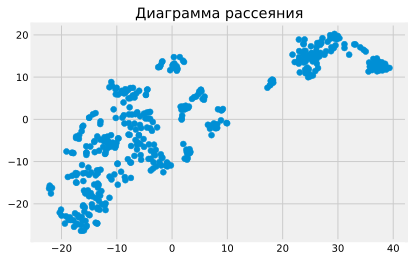

In [60]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

x = X_train_tsne[:, 0]
y = X_train_tsne[:, 1]

plt.scatter(x, y)

plt.title('Диаграмма рассеяния')

plt.show()

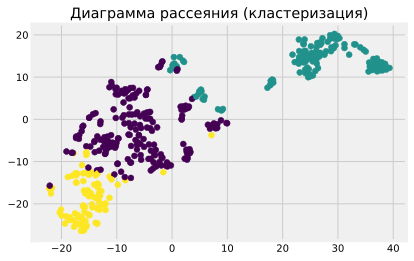

In [67]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(x, y, c = labels_train)

plt.title('Диаграмма рассеяния (кластеризация)')

plt.show()

In [81]:
# Вычисление средних значений цены по кластерам 

y_mean0, y_mean1, y_mean2 = float(y_train[labels_train == 0].mean()), float(y_train[labels_train == 1].mean()), float(y_train[labels_train == 2].mean())

print(f'Кластер 0: {y_mean0}', f'\nКластер 1: {y_mean1}', f'\nКластер 2: {y_mean2}')

Кластер 0: 24.958115183246072 
Кластер 1: 16.165354330708666 
Кластер 2: 27.788372093023252


In [86]:
# Вычисление средних значений CRIM по кластерам 

CRIM_mean0, CRIM_mean1, CRIM_mean2 = float(X_train.loc[labels_train == 0, 'CRIM'].mean()), float(X_train.loc[labels_train == 1, 'CRIM'].mean()), float(X_train.loc[labels_train == 2, 'CRIM'].mean())

print(f'Кластер 0: {CRIM_mean0}', f'\nКластер 1: {CRIM_mean1}', f'\nКластер 2: {CRIM_mean2}')

Кластер 0: 0.42166020942408367 
Кластер 1: 10.797028425196853 
Кластер 2: 0.07356558139534886


In [96]:
labels_test = kmeans.predict(X_test_scaled)

In [105]:
# Вычисление средних значений цены по кластерам 

y_test_mean0, y_test_mean1, y_test_mean2 = float(y_test[labels_test == 0].mean()), float(y_test[labels_test == 1].mean()), float(y_test[labels_test == 2].mean())

print(f'Кластер 0: {y_test_mean0}', f'\nКластер 1: {y_test_mean1}', f'\nКластер 2: {y_test_mean2}')

Кластер 0: 22.031111111111112 
Кластер 1: 16.437142857142856 
Кластер 2: 28.413636363636364


In [104]:
# Вычисление средних значений CRIM по кластерам 

CRIM_test_mean0, CRIM_test_mean1, CRIM_test_mean2 = float(X_test.loc[labels_test == 0, 'CRIM'].mean()), float(X_test.loc[labels_test == 1, 'CRIM'].mean()), float(X_test.loc[labels_test == 2, 'CRIM'].mean())

print(f'Кластер 0: {CRIM_test_mean0}', f'\nКластер 1: {CRIM_test_mean1}', f'\nКластер 2: {CRIM_test_mean2}'  )

Кластер 0: 0.2845831111111111 
Кластер 1: 10.165531142857143 
Кластер 2: 0.07985181818181818
